Iris Data Prediction using Decision Tree Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/file/iris.csv')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Some Basic Information of Data set

In [ ]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Visualizing Iris Data

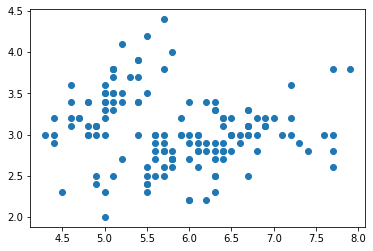

In [ ]:
# Visualizing the dataset features to find patteren to slove our task
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.show()

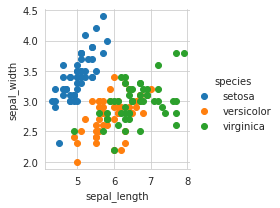

In [ ]:
# Using seaborn lib to visualized 2 features based on target variable

sns.set_style('whitegrid')
sns.FacetGrid(df,hue = 'species')\
     .map(plt.scatter,'sepal_length','sepal_width')\
     .add_legend() # used for group shows

plt.show()

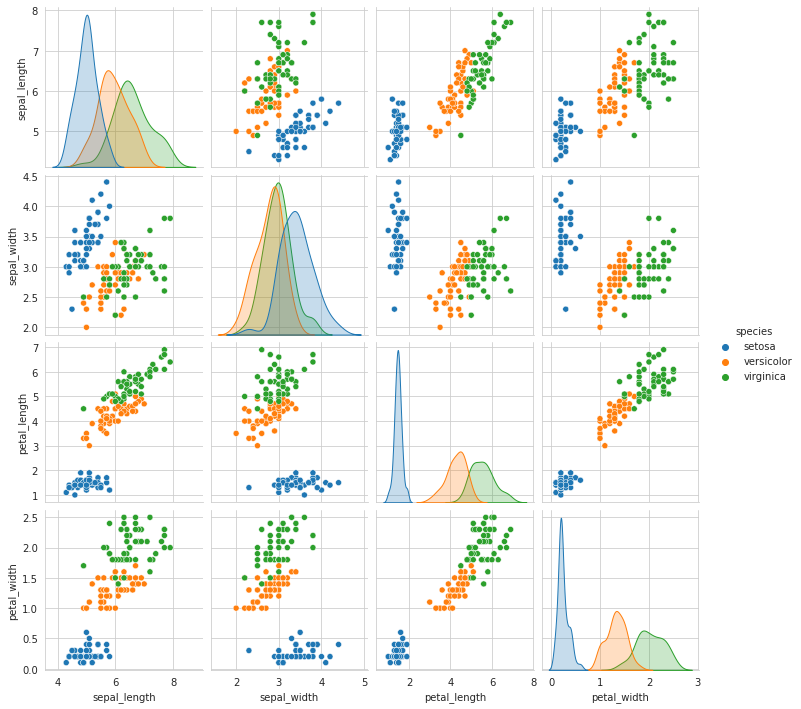

In [ ]:
#Pair Plot gives the relationship between all features distribution with each other
sns.pairplot(df,hue='species')
plt.show()

Exploring Some New Features

In [ ]:
#Just trying to explore some new feature using the given data
df['sepal_diff']=df['sepal_length']-df['sepal_width']
df['petal_diff']=df['petal_length']-df['petal_width']

In [ ]:
df['sepal_petal_len_diff']=df['sepal_length']-df['petal_length']
df['sepal_petal_width_diff']=df['sepal_width']-df['petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_diff,petal_diff,sepal_petal_len_diff,sepal_petal_width_diff
0,5.1,3.5,1.4,0.2,setosa,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,setosa,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,setosa,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,setosa,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.7,2.9,1.5,0.7
146,6.3,2.5,5.0,1.9,virginica,3.8,3.1,1.3,0.6
147,6.5,3.0,5.2,2.0,virginica,3.5,3.2,1.3,1.0
148,6.2,3.4,5.4,2.3,virginica,2.8,3.1,0.8,1.1


In [ ]:
df['sepal_petal_len_wid_diff']=df['sepal_length']-df['petal_width']
df['sepal_petal_width_len_diff']=df['sepal_width']-df['petal_length']
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_diff,petal_diff,sepal_petal_len_diff,sepal_petal_width_diff,sepal_petal_len_wid_diff,sepal_petal_width_len_diff
0,5.1,3.5,1.4,0.2,setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,virginica,2.8,3.1,0.8,1.1,3.9,-2.0


Now Finding Relationship b/w new feature based on class labels using pair plot

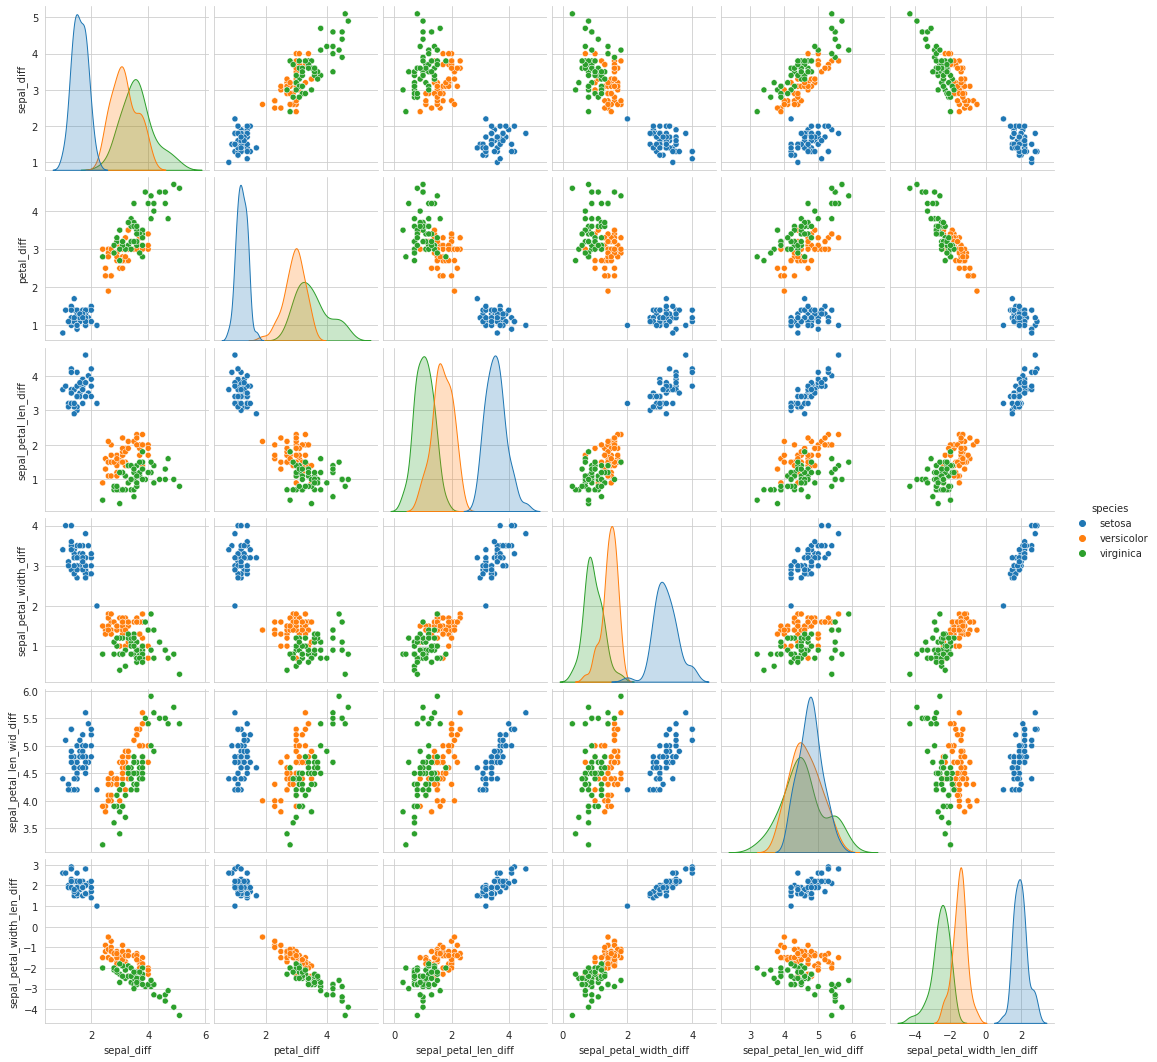

In [ ]:
# Finding Relationship b/w new feature based on class labels
sns.pairplot(df[['species','sepal_diff','petal_diff','sepal_petal_len_diff',\
                 'sepal_petal_width_diff','sepal_petal_len_wid_diff',\
                 'sepal_petal_width_len_diff']],hue='species')
plt.show()

Building Classification Model

In [ ]:
# Now try to create a model to solve our task
# As per our analysis , we can't find much information from new feature which can helpful in sloving our problem
#For solving our task i have selected few features amongs all to build up our best model

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

x=df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width'	,	'sepal_diff',	'petal_diff',	'sepal_petal_len_diff',	'sepal_petal_width_diff',	'sepal_petal_len_wid_diff',	'sepal_petal_width_len_diff']]
y=df['species']

In [ ]:
# Before training the model we have split our data into actual train and actual test dataset for training and validating purpose.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
Xt,Xcv,Yt,Ycv = train_test_split(Xtrain,Ytrain ,test_size=0.10,random_state=42)

In [ ]:
df_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
df_clf.fit(Xt,Yt)

DecisionTreeClassifier()

[Text(0.45454545454545453, 0.9166666666666666, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5454545454545454, 0.75, 'X[9] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[6] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.18181818181818182, 0.25, 'X[7] <= 1.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.7272727272727273

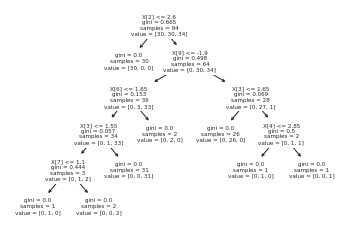

In [ ]:
tree.plot_tree(df_clf)

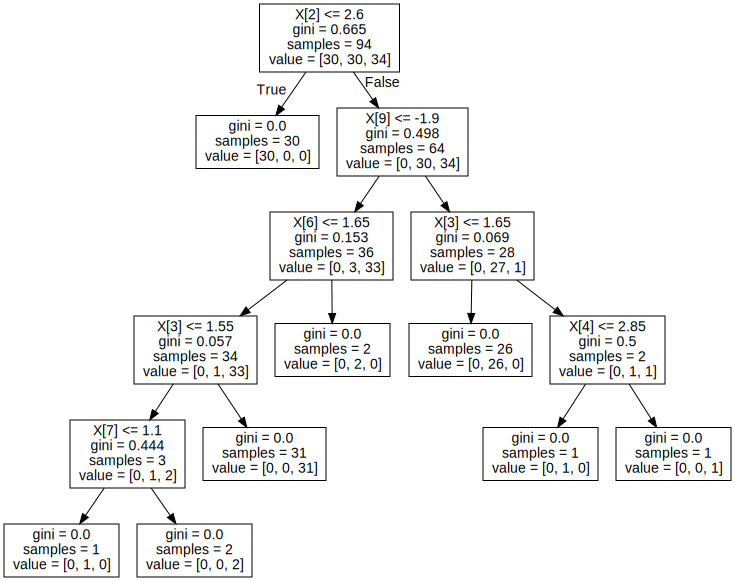

In [ ]:
dot_data = tree.export_graphviz(df_clf,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#As our model has been trained….
#Now we can validate our Decision tree using cross validation method to
#get the accuracy or performance score of our model.

In [ ]:

# As our model has been tarined
# Now we can validate our Decision tree using cross validation mathod to get the accuracy or performance score of our model
print('Accuracy score is:',cross_val_score(df_clf,Xt,Yt, cv=3,scoring='accuracy').mean())

Accuracy score is: 0.8938172043010754


In [ ]:
# checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = df_clf.predict(Xcv)
print('Accuracy Score For Validation Test Data Is :', accuracy_score(Ycv,Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy Score For Validation Test Data Is : 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [ ]:
# checking our model performance on actual unseen test data
YT_hat =df_clf.predict(Xtest)
YT_hat
print('Model Accuracy Score on totally unseen data(Xtest) is : ',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is :  95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 1, 12]],

       [[31,  1],
        [ 1, 12]]])

[Text(0.45454545454545453, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.36363636363636365, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5454545454545454, 0.7857142857142857, 'X[9] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.36363636363636365, 0.6428571428571429, 'X[6] <= 1.65\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.2727272727272727, 0.5, 'X[3] <= 1.65\ngini = 0.1\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(0.18181818181818182, 0.35714285714285715, 'X[9] <= -2.6\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.2727272727272727, 0.21428571428571427, 'X[7] <= 1.2\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.36363636363636365, 0.07142857142857142, 'gini = 0.0\nsamp

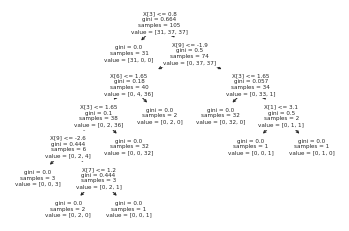

In [ ]:
''' Training model on actual train data'''
df_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
df_Fclf.fit(Xtrain, Ytrain)
#Visualize tree structures
tree.plot_tree(df_Fclf)

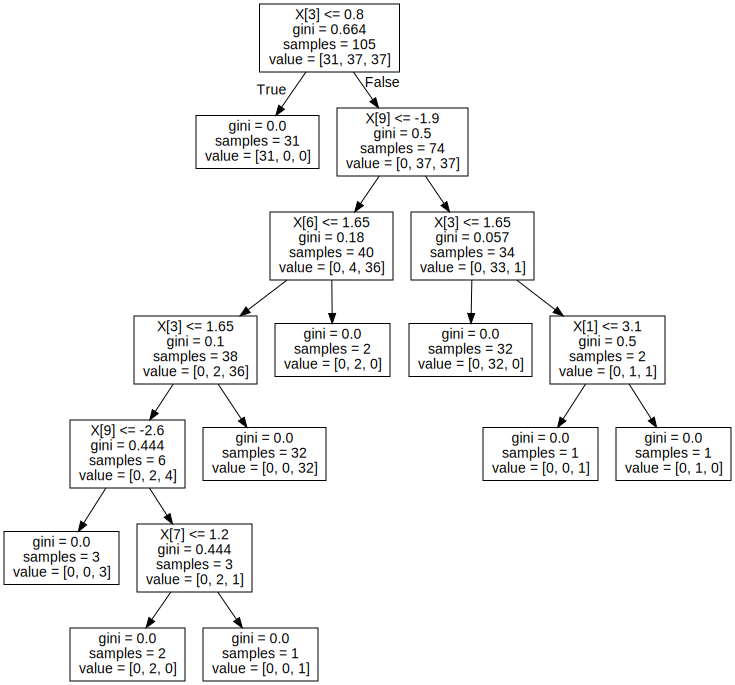

In [ ]:
dot_data = tree.export_graphviz(df_Fclf,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# checking the performance of model on actual test data
YT_Fhat = df_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest,YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 1, 12]],

       [[31,  1],
        [ 1, 12]]])